# Assignment 2 - Clustering

Some basic code has been provided for you. You will need to make some small edits to complete the tasks in the instructions document. 

Feel free to write additional code as needed to support/illuminate your discussion in your report.

In [1]:
import numpy as np
from numpy import unique  # can also just use np.unique
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import make_classification
from sklearn.cluster import DBSCAN

# Task 1

Load in the <code>salary_data.csv</code> dataset which has 50 data points and two dimensions (age, salary).

Randomly generate a dataset with <b>50</b> data points using the <code>generate_random_data</code> method below.

Run kmeans 10 times on each dataset.

#### Import Salary Dataset

In [2]:
salary_data = pd.read_csv('data/salary_data.csv')
print(salary_data.shape)
salary_data.head()

(49, 2)


,age,income
0,14,2500
1,15,5500
2,16,5000
3,15,4500
4,16,2000


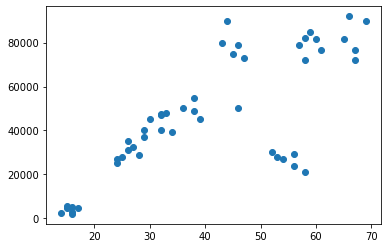

In [3]:
plt.scatter(salary_data.age, salary_data.income)

#### 1.1 Generate Random Data

In [4]:
def generate_random_data(n):
    '''function to generate n random 2D data points stored in an (n, 2) dataframe'''
    return pd.DataFrame({'x':np.random.rand(n), 'y':np.random.rand(n)})

Every time you run the <code>generate_random_data</code> function you will generate a new dataset so make sure you assign your dataset to a variable and don't write over that variable unless you're finished with it.

In [5]:
########## EVERY TIME YOU RUN THIS YOU WILL GENERATE NEW DATA ##########

# set n equal to the size of the dataset you want
rand_data = generate_random_data(50)

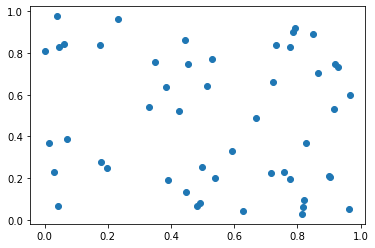

In [6]:
plt.scatter(rand_data.x, rand_data.y)

#### 1.2 Run K-means
Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans

In [7]:
# use this function to run kmeans on your dataframe

def run_kmeans(k, dataset, x_col='', y_col=''):
    # let's make a copy of the dataframe so we can freely add columns
    df = dataset.copy(deep=True) # just for our use case, don't do this as standard

    kmeans = KMeans(n_clusters=k, init='random', n_init=1)
    kmeans.fit(dataset)
    cluster_labels = kmeans.fit_predict(dataset)
    df[f'cluster_labels'] = cluster_labels
    plt.scatter(df[x_col], df[y_col], c=kmeans.labels_.astype(float))
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    
    plt.show()
    
    return df

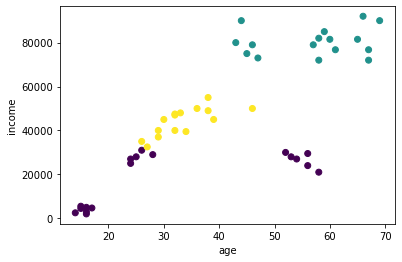

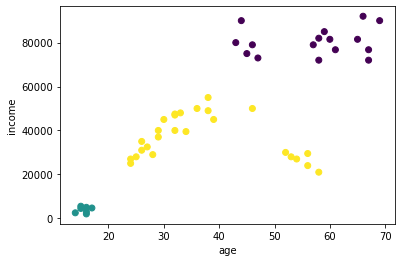

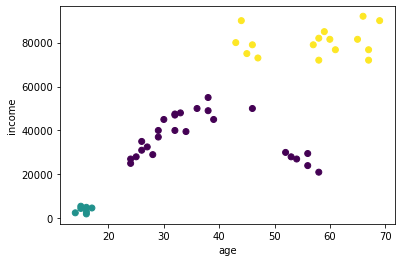

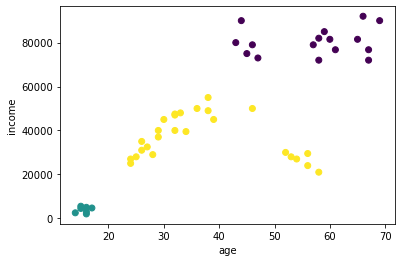

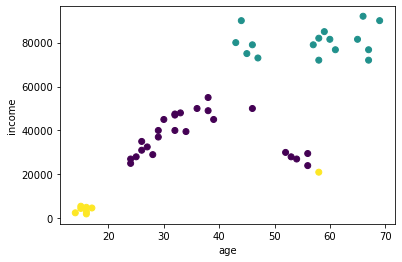

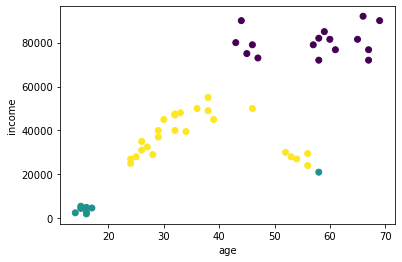

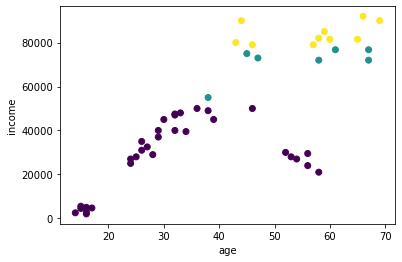

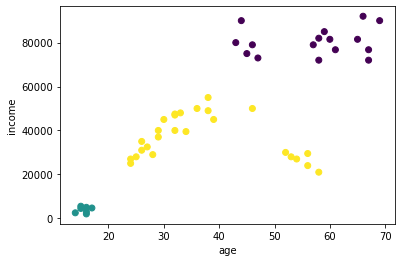

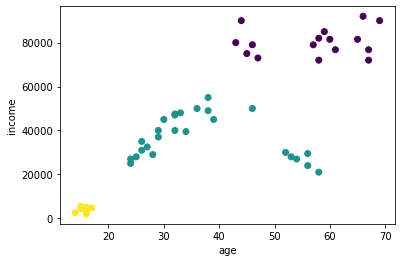

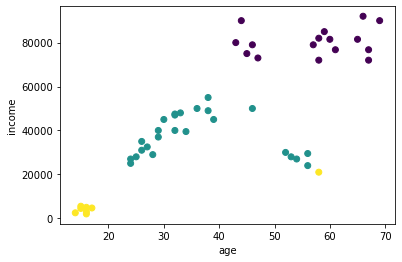

In [8]:
#run k-means 10 times on the salary dataset
run_1_df = run_kmeans(3, salary_data, x_col='age', y_col='income')
run_2_df = run_kmeans(3, salary_data, x_col='age', y_col='income')
run_3_df = run_kmeans(3, salary_data, x_col='age', y_col='income')
run_4_df = run_kmeans(3, salary_data, x_col='age', y_col='income')
run_5_df = run_kmeans(3, salary_data, x_col='age', y_col='income')
run_6_df = run_kmeans(3, salary_data, x_col='age', y_col='income')
run_7_df = run_kmeans(3, salary_data, x_col='age', y_col='income')
run_8_df = run_kmeans(3, salary_data, x_col='age', y_col='income')
run_9_df = run_kmeans(3, salary_data, x_col='age', y_col='income')
run_10_df = run_kmeans(3, salary_data, x_col='age', y_col='income')

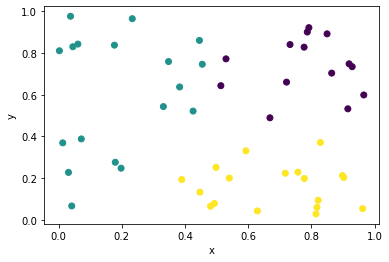

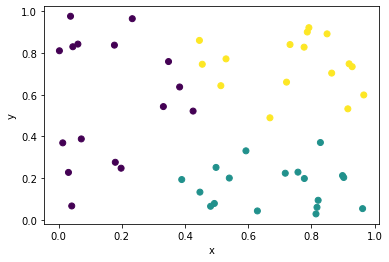

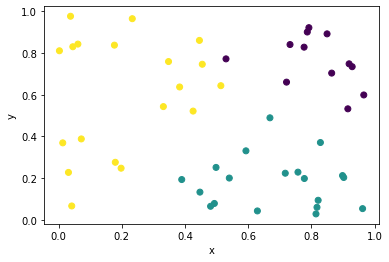

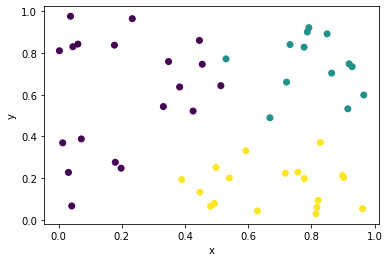

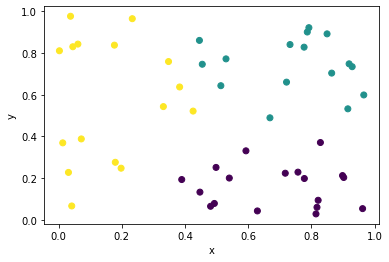

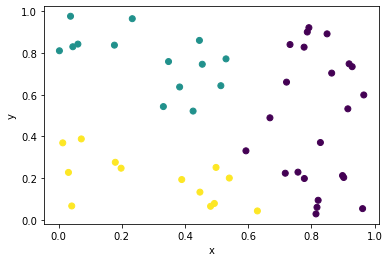

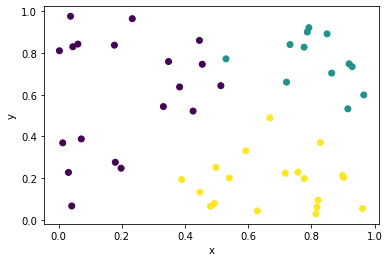

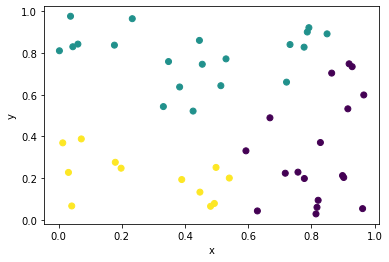

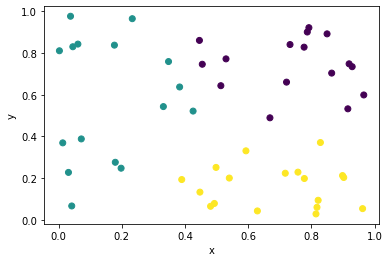

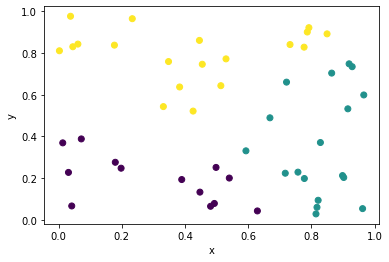

In [9]:
#run k-means 10 times on the random dataset generated
run_a_df = run_kmeans(3, rand_data, x_col='x', y_col='y')
run_b_df = run_kmeans(3, rand_data, x_col='x', y_col='y')
run_c_df = run_kmeans(3, rand_data, x_col='x', y_col='y')
run_d_df = run_kmeans(3, rand_data, x_col='x', y_col='y')
run_e_df = run_kmeans(3, rand_data, x_col='x', y_col='y')
run_f_df = run_kmeans(3, rand_data, x_col='x', y_col='y')
run_g_df = run_kmeans(3, rand_data, x_col='x', y_col='y')
run_h_df = run_kmeans(3, rand_data, x_col='x', y_col='y')
run_i_df = run_kmeans(3, rand_data, x_col='x', y_col='y')
run_j_df = run_kmeans(3, rand_data, x_col='x', y_col='y')

### Elbow Method

In [9]:
def get_elbow_plot(dataset, x_col='', y_col='', min_k=1, max_k=10):
    
    # for what values of k do we want to run
    k_range = range(min_k, max_k)

    # calculate sum of squared error for each value of k
    sse = [] # initialze empty list

    for k in k_range:
        km = KMeans(n_clusters=k) # set whatever other parameters you want here
        km.fit(dataset)
        sse.append(km.inertia_)

    plt.xlabel('K')
    plt.ylabel('Sum of Squared Error')
    plt.plot(k_range, sse)
    plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


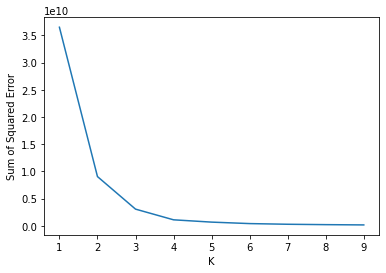

In [10]:
get_elbow_plot(salary_data, x_col='age', y_col='income')

In [11]:
# create your own dataset of 30 points

# generate an elbow plot for that data

#### Normalize salary data

In [12]:
scaler = MinMaxScaler()
scaler.fit(salary_data[['age']])
salary_data['normalized_age'] = scaler.transform(salary_data[['age']])
salary_data.head()

,age,income,normalized_age
0,14,2500,0.000000
1,15,5500,0.018182
2,16,5000,0.036364
3,15,4500,0.018182
4,16,2000,0.036364


In [13]:
scaler = MinMaxScaler()
scaler.fit(salary_data[['income']])
salary_data['normalized_income'] = scaler.transform(salary_data[['income']])
salary_data.head()

,age,income,normalized_age,normalized_income
0,14,2500,0.000000,0.005556
1,15,5500,0.018182,0.038889
2,16,5000,0.036364,0.033333
3,15,4500,0.018182,0.027778
4,16,2000,0.036364,0.000000


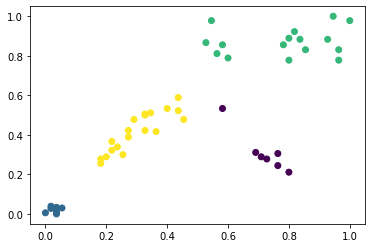

In [14]:
km = KMeans(n_clusters=4) # or whatever number of k you want
cluster_labels = km.fit_predict(salary_data[['normalized_age', 'normalized_income']])
salary_data['normalized_cluster'] = cluster_labels
plt.scatter(salary_data.normalized_age, salary_data.normalized_income, c=km.labels_.astype(float))

# Task 2 

We'll use Sklearn's <code>make_classification</code> method to generate a dataset. See documentation here: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html

We aren't interested in the labels per-se, but it will generate some nicely clustered data for us to try out some algorithms on.

In [ ]:
# define dataset
data_values, class_labels = make_classification(n_samples=2000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=2, random_state=None)

In [ ]:
# create scatter plot for samples from each class
for class_value in range(len(unique(class_labels))):
    # get row indexes for samples with this class
    row_ix = np.where(class_labels == class_value)
    # create scatter of these samples
    plt.scatter(data_values[row_ix, 0], data_values[row_ix, 1])
# show the plot
plt.show()

#### K-means

In [ ]:
kmeans_model = KMeans(n_clusters=4) # set k to whatever makes sense for your data
kmeans_model.fit(data_values)
kmeans_clusters = kmeans_model.predict(data_values)

# create scatter plot for samples from each cluster
for cluster in unique(kmeans_clusters):
    # get row indexes for samples with this cluster
    row_ix = np.where(kmeans_clusters == cluster)
    # create scatter of these samples
    plt.scatter(data_values[row_ix, 0], data_values[row_ix, 1])
# show the plot
plt.show()

#### DBSCAN

In [ ]:
dbscan_model = DBSCAN(eps=0.30, min_samples=8)
dbscan_clusters = dbscan_model.fit_predict(data_values)

print(f'Found {len(unique(dbscan_clusters))} clusters')

# create scatter plot for samples from each cluster
for cluster in unique(dbscan_clusters):
    # get row indexes for samples with this cluster
    row_ix = np.where(dbscan_clusters == cluster)
    # create scatter of these samples
    plt.scatter(data_values[row_ix, 0], data_values[row_ix, 1])
# show the plot
plt.show()

#### Some other algorithm....

In [ ]:
# your code here